פרויקט חן רזיאל פלד

שלב 1 : המשתמש כותב ברכה

In [1]:
greeting = input("Enter a greeting: ")  # Prompt the user for a greeting


שלב 2 : המשתמש מגדיר את הסגנון של הברכה

In [2]:
style_of_the_greeting = input ("Enter the style of the greeting ")  # Prompt the user for the style of the greeting


שלב 3: המר את הסגנון לסגנון ברכה לגיטימי

In [3]:
# code with structured output to get only the legitimate greeting style

# style_of_the_greeting = output

from pydantic import BaseModel                                 # Import BaseModel from pydantic for data validation openai_client                                       
from openai import OpenAI                                      # Import the OpenAI library
import os                                                      # Import the os library for environment variable access
from dotenv import load_dotenv                                 # Import load_dotenv to load environment variables from a .env file
load_dotenv()           				                       # Load environment variables from a .env file

openai_api_key = os.getenv("OPENAI_API_KEY")   	     	       # Get the OpenAI API key from environment variables
openai_client = OpenAI (api_key=openai_api_key)    	           # Initialize the OpenAI client with the API key

class greeting_famous_man (BaseModel):                        # Define a Pydantic model for the prompt
    greeting: str                                              # Define a field for the greeting
    style_of_the_greeting : str                                # Define a field for the style of the greeting     
                                                 

openai_completion = openai_client.chat.completions.create(     # Create a chat completion request
	model="gpt-4o",  		            					   # Specify the model to use
	messages=                                                  # List of messages for the chat completion
    [
		{"role": "system", "content":    	     	           # System message to set the context for the model
   			"""
            The 'greeting' remains exactly as the user wrote it, 
   			disregard the 'style of the greeting', 
   			just remove any curse words, 
   			for example at the beginning of the 'greeting', 
   			it says:'Happy birthday until 120 years! I wish you happiness, health, and success, bitch!!' 
   			And at the end of the 'greeting', 
   			it will say: 'Happy birthday until 120 years! I wish you happiness, health, and success!!'. 
   			Refine the 'style_of_the_greeting' to make it more precise, focus only on the 'style_of_the_greeting' and not write a new greeting. 
   			return a JSON object with the fields: greeting, style_of_the_greeting.
            """
   		},
		{"role": "user", "content": greeting + style_of_the_greeting },   # Combine the greeting and style into a single message  
	],
	response_format = {"type": "json_object"},                       # Request JSON structured output
)

response_format = openai_completion.choices[0].message.content       # Get the structured response content
print (response_format)                                              # Print the structured response



{
  "greeting": "שנה טובה לכל החברים שלי!",
  "style_of_the_greeting": "חגיגי ומלכותי"
}


שלב 3 : המשתמש מאחד את הברכה + הסגנון של הברכה

In [4]:
import json                                         
response_format = json.loads(response_format)           # Parse the JSON response into a Python dictionary
greeting_with_role = response_format["greeting"] + "\nchange the style of the greeting to: " + " " + response_format["style_of_the_greeting"]  # Combine the greeting and style into a single string
print(greeting_with_role)                               # Print the final greeting with the style change

שנה טובה לכל החברים שלי!
change the style of the greeting to:  חגיגי ומלכותי


שלב 4 : קלוד מקבל את הברכה + הסגנון ומוציא ברכה בסגנון חדש   

In [6]:
# add here structured output to get only the greeting without non relevant text
import anthropic                                                                    # Import the anthropic library
import os                                                                           # Import the os library for environment variable access
from dotenv import load_dotenv                                                      # Import load_dotenv to load environment variables from a .env file
load_dotenv()                                                                       # Load environment variables from .env file

claude_api_key = os.getenv("CLAUDE_API_KEY")                                         # Get the Claude API key from environment variables
claude_client = anthropic.Anthropic(api_key=claude_api_key)                          # Initialize the Claude client with the API key

messages = [                                                                          # Prepare messages for the Claude API
    {"role": "user", "content": greeting_with_role}                                   # User message with greeting and role
]

try:                                                                                   # Try to call the Claude API                                          
    claude_response = claude_client.messages.create(                                   # Call the Claude API to create a message
        model="claude-3-5-haiku-20241022",                                             # Specify the model to use
        max_tokens=600,                                                                # Set the maximum tokens for the response 
        messages=messages                                                              # Pass the prepared messages
    )
    print("the new greeting:\n")      
    final_greeting =  claude_response.content[0].text                                  # Extract the final greeting from the Claude response
    print(final_greeting)                                                              # Print the final greeting from the Claude response
except anthropic.APIError as e:                                                        # Handle API errors
    print(f"Error calling Claude API: {e}")                                            # Print the error message if API call fails
    print("Please ensure you have a valid API key and the Claude API is accessible.")  # Suggest checking API key and accessibility


the new greeting:

שנה טובה וברוכה! יהי רצון שתבוא עלינו ברכה והצלחה, מלכות של שמחה ועונג!


שלב 5 : לוקחים את החלק העיקרי בברכה

In [7]:
# code with structured output to get only the legitimate greeting style

# style_of_the_greeting = output

from pydantic import BaseModel                                                      # Import BaseModel from pydantic for data validation openai_client                                       
from openai import OpenAI                                                           # Import the OpenAI library
import os                                                                           # Import the os library for environment variable access
from dotenv import load_dotenv                                                      # Import load_dotenv to load environment variables from a .env file
load_dotenv() 

openai_api_key = os.getenv("OPENAI_API_KEY")   	     	                            # Get the OpenAI API key from environment variables
openai_client = OpenAI (api_key=openai_api_key)                                     # Initialize the OpenAI client with the API key

class new_greeting_famous_man (BaseModel):                                          # Define a Pydantic model for the prompt
    final_greeting: str                                                             # Define a field for the final greeting
                          
                                                 

openai_completion = openai_client.chat.completions.create(
	model="gpt-4o",
	messages=[
		{"role": "system", "content": "Extract the entire greeting from the final_greeting, remove any commentary or notes (such as stage directions or actions), and return a JSON object with the field: final_greeting."},
		{"role": "user", "content": final_greeting},                  # Use the final greeting from Claude's response       
        
	],
response_format = {"type": "json_object"},  # Request JSON structured output
)

response_format_final_greeting = openai_completion.choices[0].message.content       # Get the structured response content
print (response_format_final_greeting)                                              # Print the structured response



{
  "final_greeting": "שנה טובה וברוכה! יהי רצון שתבוא עלינו ברכה והצלחה, מלכות של שמחה ועונג!"
}


שלב 6 : הדפסת שמות המפורסמים

In [8]:
# list of famous people with their details
list_famous_person = [
    {"name": "Adir Miller", "age": "young", "gender": "man", "path": "../images/Adir Miller.png"},
    {"name": "Albert Einstein", "age": "old", "gender": "man", "path": "../images/Albert Einstein.png"},
    {"name": "Ariana Grande", "age": "young", "gender": "woman", "path": "../images/Ariana Grande.png"},
    {"name": "Assi Ezer", "age": "young", "gender": "man", "path": "../images/Assi Ezer.png"},
    {"name": "Bruno Mars", "age": "young", "gender": "man", "path": "../images/Bruno Mars.png"},
    {"name": "Cristiano Ronaldo", "age" : "young", "gender": "man", "path": "../images/Cristiano Ronaldo.png"},
    {"name": "Donald Trump", "age": "old", "gender": "man", "path": "../images/Donald Trump.png"},
    {"name": "Eliad Nahum", "age": "young", "gender": "man", "path": "../images/Eliad Nahum.png"},
    {"name": "Eliana Tidhar", "age": "young", "gender": "woman", "path": "../images/Eliana Tidhar.png"},
    {"name": "Eyal Golan", "age": "young", "gender": "man", "path": "../images/Eyal Golan.png"},
    {"name": "Gal Gadot", "age": "young", "gender": "woman", "path": "../images/Gal Gadot.png"},
    {"name": "Katy Perry", "age": "young", "gender": "woman", "path": "../images/Katy Perry.png"},
    {"name": "Leo Messi", "age": "young", "gender": "man", "path": "../images/Leo Messi.png"},
    {"name": "Noa Kirl", "age": "young", "gender": "woman", "path": "../images/Noa Kirl.png"},
    {"name": "Oral Tsabari", "age": "young", "gender": "man", "path": "../images/Oral Tsabari.png"},
    {"name": "Sam Altman", "age": "young", "gender": "man", "path": "../images/Sam Altman.png"},
    {"name": "Steve Jobs", "age": "old", "gender": "man", "path": "../images/Steve Jobs.png" },
    {"name": "The little Michal", "age": "young", "gender": "woman", "path": "../images/The little Michal.png"},
    {"name": "Tom Cruise", "age": "old", "gender": "man", "path": "../images/Tom Cruise.png"},
    {"name": "Will Smith", "age": "old", "gender": "man", "path": "../images/Will Smith.png"}
    
]


print("Famous people list:")              # Print a header for the famous people list
  
for person in list_famous_person:         # Loop through the list of famous people
    print("-", person["name"])            # Print each person's name with a hyphen


  


Famous people list:
- Adir Miller
- Albert Einstein
- Ariana Grande
- Assi Ezer
- Bruno Mars
- Cristiano Ronaldo
- Donald Trump
- Eliad Nahum
- Eliana Tidhar
- Eyal Golan
- Gal Gadot
- Katy Perry
- Leo Messi
- Noa Kirl
- Oral Tsabari
- Sam Altman
- Steve Jobs
- The little Michal
- Tom Cruise
- Will Smith


שלב 7 : בחירת מפורסם מתוך רשימה

In [9]:
famous_person = input("Choose a famous person: ")                                             # Prompt the user to choose a famous person

isFamous = False                                                                              # Initialize a flag to check if the person is famous
for person in list_famous_person:                                                             # Loop through the list of famous people
    if person["name"] == famous_person  :                                                     # Check if the chosen person is in the list
       print(f"You choose {person["name"]}.")                                                 # Print the chosen person's name
       isFamous = True                                                                        # if the person is famous isFamous = True
       break                                                                                  # break the loop if the person is found

if isFamous == False:                                                                         # if the person is not found in the list isFamous = False                                          
    print(f"{famous_person} is not in the list of famous people , choose again .")            # Print a message if the person is not found in the list

You choose Eliana Tidhar.


שלב 8 : התאמת הקול למפורסם

In [10]:
# choose from the lost of voices automatically

choose_voice = ["coral", "onyx", "fable", "nova"]                # List of available voices

if person["gender"] == "man" and person["age"] == "old":        # Check if the person is an old and man
   voice = "onyx"                                               # voice for old and man person
   print(f"Chosen voice for {person['name']}: {voice}")         # Print the chosen voice for the person      
elif person["gender"] == "man" and person["age"] == "young":    # Check if the person is a young and man 
   voice = "fable"                                              # voice for young and a man person
   print(f"Chosen voice for {person['name']}: {voice}")         # Print the chosen voice for the person
       
elif person["gender"] == "woman" and person["age"] == "old":   # Check if the person is an old and a woman
   voice = "nova"                                              # voice for old and woman person 
   print(f"Chosen voice for {person['name']}: {voice}")        # Print the chosen voice for the person
else:                                                          # Check if the person is a young and a woman person
   voice = "coral"                                             # voice for young and woman person
   print(f"Chosen voice for {person['name']}: {voice}")        # Print the chosen voice for the person  

Chosen voice for Eliana Tidhar: coral


שלב 9 :ממיר ושומר את הברכה החדשה בקטע אודיו 

In [13]:
import json                                                                        # Import the json library for JSON handling
                                                           
from openai import OpenAI                                                          # Import the OpenAI library
                                                    

openai_api_key = os.getenv("OPENAI_API_KEY")                                       # Get the OpenAI API key from environment variables
openai_client = OpenAI(api_key = openai_api_key)                                   # Initialize the OpenAI client

response_format_final_greeting = openai_completion.choices[0].message.content      # Get the structured response content
final_greeting_dict = json.loads(response_format_final_greeting)                   # Parse the JSON response into a Python dictionary
clean_greeting = final_greeting_dict["final_greeting"]                             # Extract the final greeting from the dictionary
print("Final greeting:", clean_greeting)                                           # Print the final greeting
print("Voice chosen:", voice)                                                      # Print the chosen voice

speech_file_path = "../audio/new_greeting_7.mp3"                                   # Path to the audio file for the new greeting
              
openai_response = openai_client.audio.speech.create(                               # Call the OpenAI API to create speech from text
    model= "tts-1",                                                                # Specify the text-to-speech model
    voice= voice,                                                                  # Specify the voice to use
    input = clean_greeting,                                                        # Use the final greeting from the structured response                           
)    

openai_response.stream_to_file(speech_file_path)                                  # Stream the audio response to a file

Final greeting: שנה טובה וברוכה! יהי רצון שתבוא עלינו ברכה והצלחה, מלכות של שמחה ועונג!
Voice chosen: coral


C:\Users\user\AppData\Local\Temp\ipykernel_5356\677762127.py:23: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  openai_response.stream_to_file(speech_file_path)                                  # Stream the audio response to a file


שלב 10 : קולט את מספר השניות באודיו

In [14]:
from mutagen.mp3 import MP3                                        # Import the MP3 class from the mutagen library to handle MP3 files

audio = MP3(speech_file_path)                                      # Load the MP3 file to get its metadata
duration_sec = audio.info.length                                   # Get the duration of the audio in seconds

print(f"The new audio has a duration of {duration_sec:} seconds")  # Print the duration of the new audio file


The new audio has a duration of 6.336 seconds


שלב 11 : המשתמש מדפיס לינק של התמונה

In [16]:
selected_person = None                                                # Initialize a variable to hold the selected person

for person in list_famous_person:                                     # Loop through the list of famous people
    if person["name"] == famous_person:                               # Check if the chosen person matches the current person in the loop
        selected_person = person                                      # If a match is found, assign the person to selected_person
        break                                                         # Break the loop if a match is found

if selected_person:                                                   # If a person was selected
    print(f"You choose {selected_person['name']}.")                   # Print the name of the selected person
    url = open(selected_person["path"], "rb")                         # Open the file path of the selected person
    print(url)                                                        # Print the file path of the selected person
else:                                                                 # If no person was selected
    print(f"{famous_person} is not in the list of famous people.")    # Print a message indicating the person is not in the list


You choose Eliana Tidhar.
<_io.BufferedReader name='../images/Eliana Tidhar.png'>


שלב 12 : הדפסת תמונת מפורסם ראשונה בלי רקע

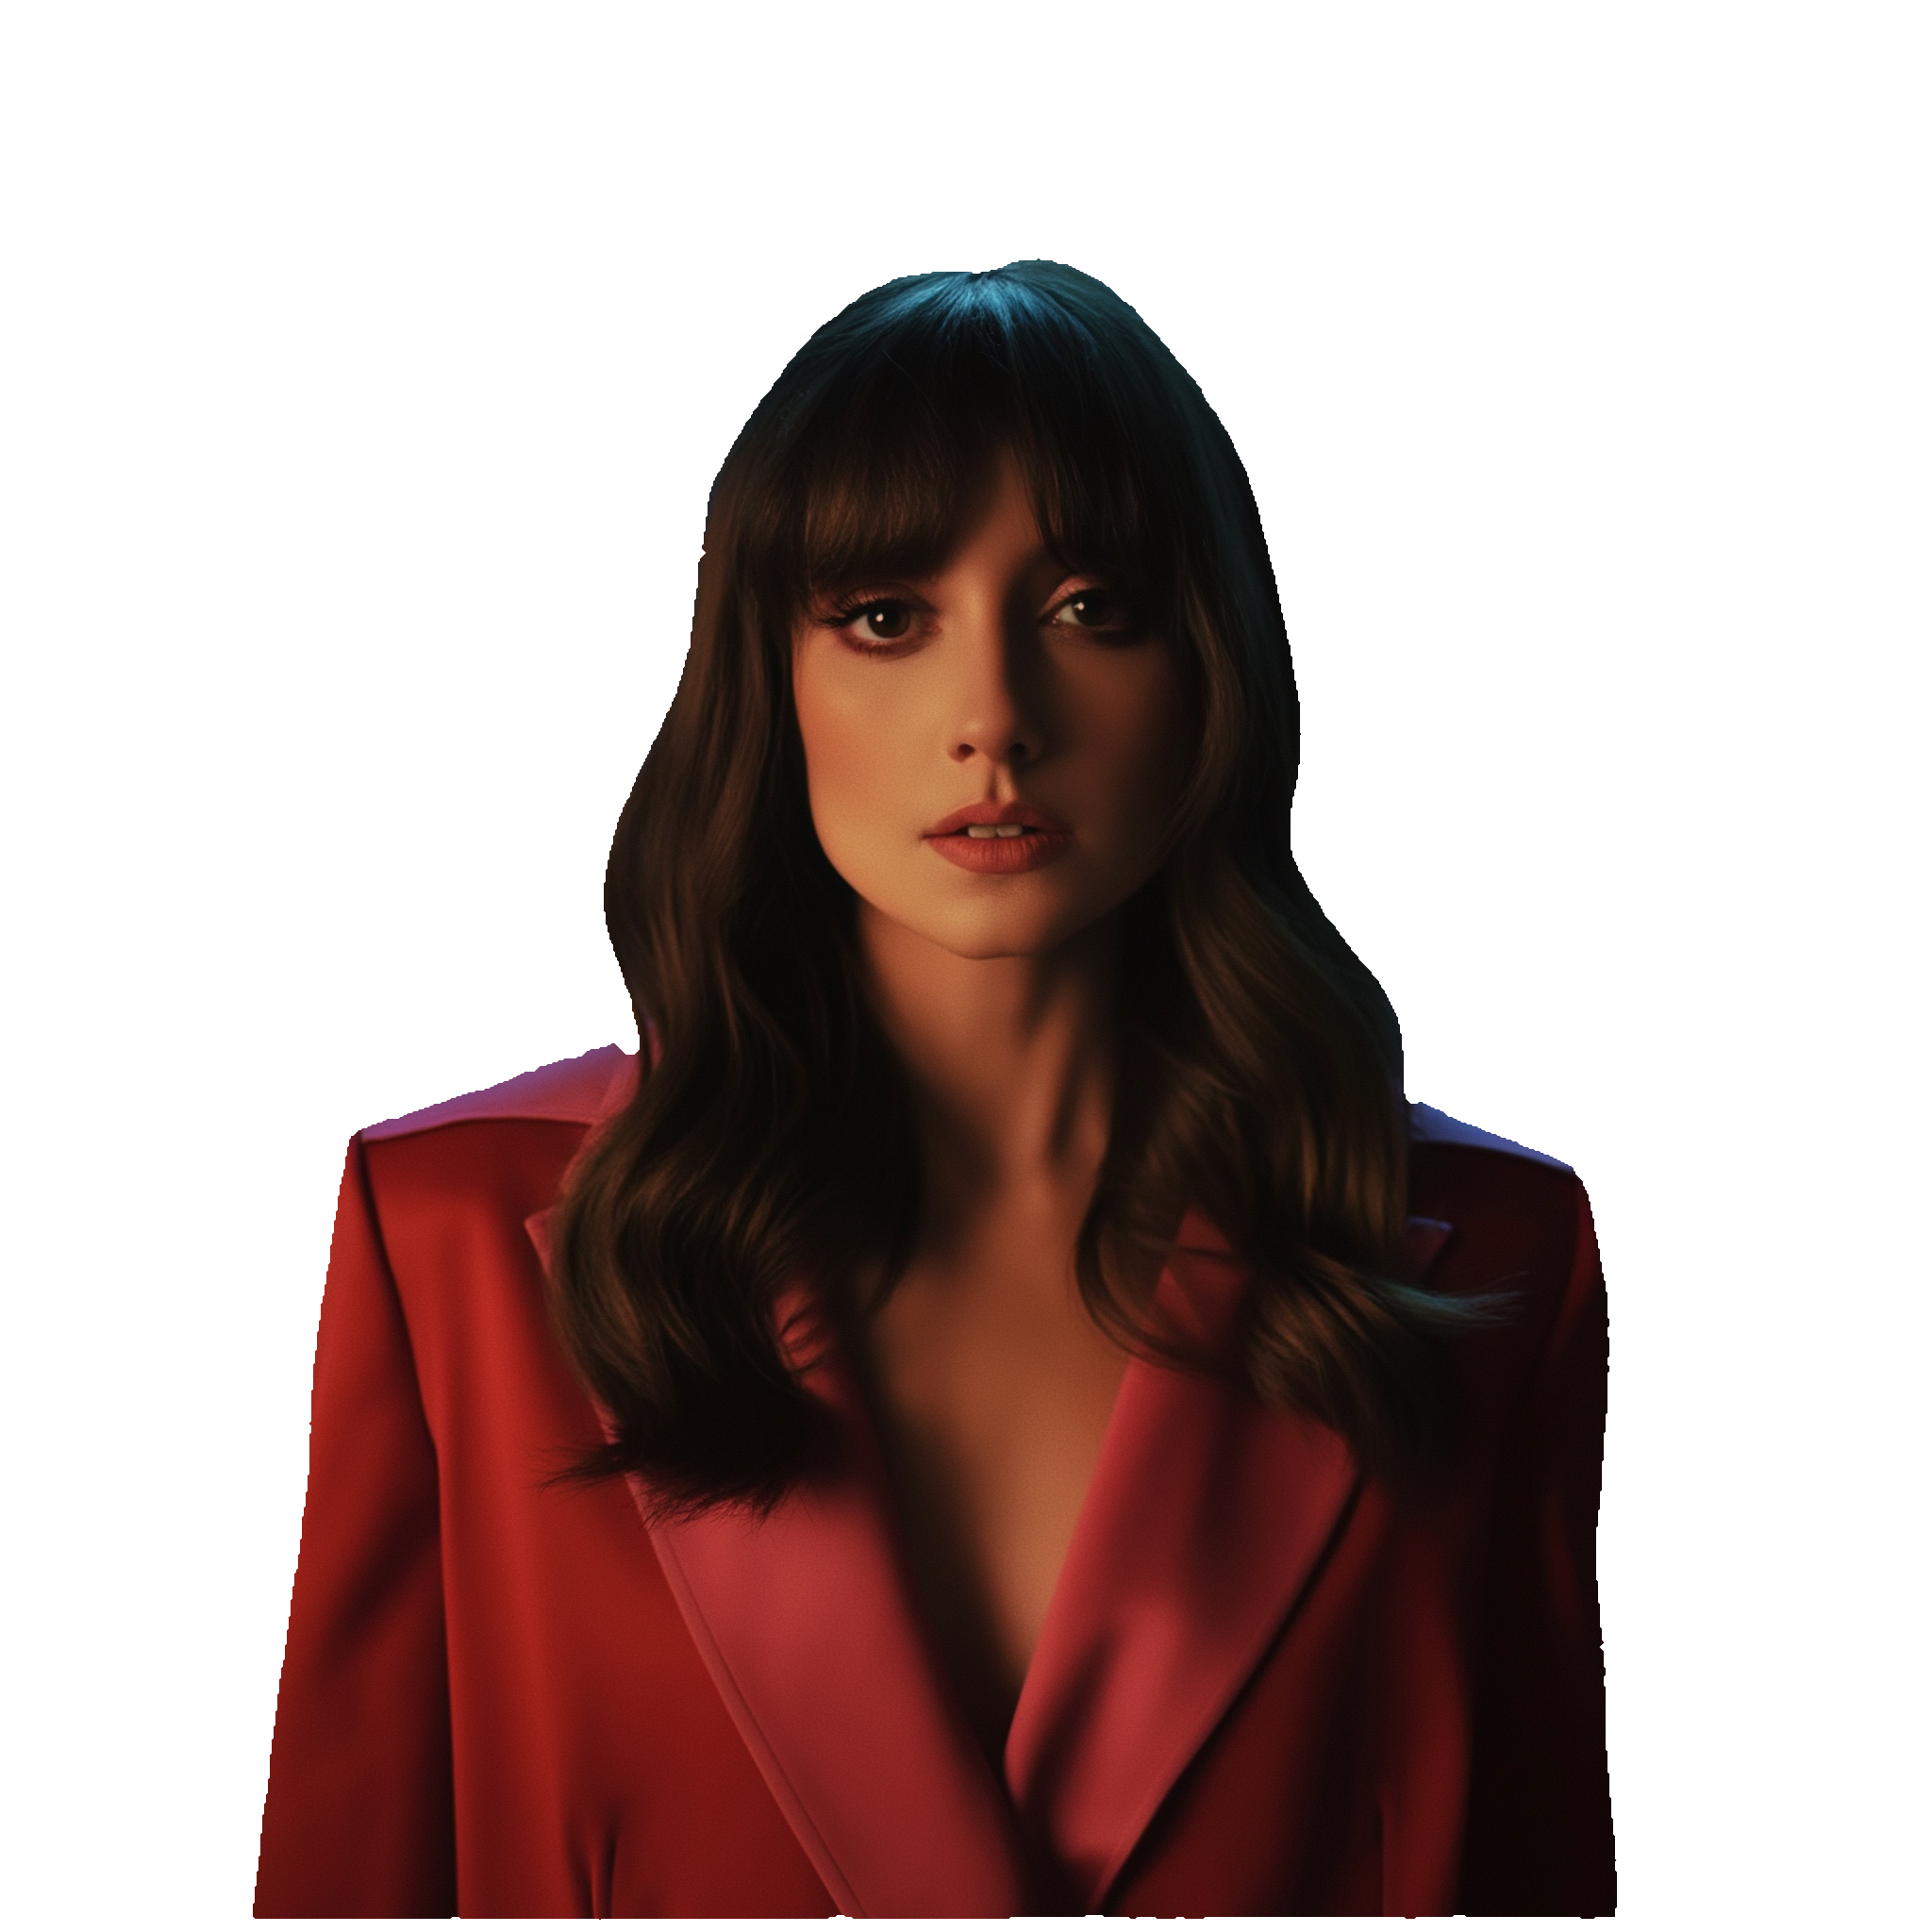

In [17]:
from IPython.display import Image      # Import the Image class from IPython.display to display images in Jupyter notebooks
Image(filename= person["path"])        # Display the image of the selected person using the file path 

שלב 13 : הדפסת מקומות ורקעים

In [18]:
list_of_locations_or_Background = ["Beach", "Mountains", "concert hall", "Forest", "library"]  # List of locations or backgrounds to choose from
print("list of locations or Background is : ")                                                 # Print a header for the list of locations or backgrounds
for location in list_of_locations_or_Background :                                              # Loop through the list of locations or backgrounds
    print("-",location)                                                                        # Print each location or background with a hyphen


list of locations or Background is : 
- Beach
- Mountains
- concert hall
- Forest
- library


שלב 14 : בחירת מקום/רקע על ידי המשתמש

In [20]:
location_or_background = input("Choose a location or background: ")                                      # Prompt the user to choose a location or background
if location_or_background in list_of_locations_or_Background:                                            # Check if the chosen location is in the list
    print(f"You choose {location_or_background}.")                                                       # Print the chosen location or background
else:                                                                                                    # If the chosen location is not in the list
    print(f"{location_or_background} is not in the list of locations or backgrounds , choose again.")    # Print a message indicating the chosen location is not in the list

You choose concert hall.


שלב 15 : התוכן שנמסר לפלקס

In [21]:
# Generate the prompt for changing the background while keeping the person in the same position
prompt_famouse = (f"Change the background to a {location_or_background} while keeping the {person['gender']} in the exact same position,maintain identical subject placement,camera angle,framing,and perspective.only replace the environment around them.")
print(prompt_famouse)            # Print the generated prompt for changing the background

Change the background to a concert hall while keeping the woman in the exact same position,maintain identical subject placement,camera angle,framing,and perspective.only replace the environment around them.


שלב 16 : ייבוא ספריות של רפליקט

In [22]:
import replicate                                                    # Import the replicate library for AI model inference
import requests                                                     # Import requests library for making HTTP requests
import time                                                         # Import time library for sleep functionality
import os                                                           # Import os library for environment variable access
from IPython.display import Image, display                          # Import Image and display from IPython.display to show images in Jupyter Notebook

from dotenv import load_dotenv  
load_dotenv ()                                                     # Import load_dotenv to load environment variables from a .env file

api_token = os.getenv("REPLICATE_API_KEY")                          # Get the Replicate API token from environment variables
os.environ["REPLICATE_API_TOKEN"] = api_token                       # Set the Replicate API token in the environment variables

if not api_token:                                                   # Check if the Replicate API token is not found
    print("⚠️ Warning: REPLICATE_API_TOKEN not found.")
    print("   Please ensure a .env file exists in the project root directory")
    print("   with the line: REPLICATE_API_TOKEN=your_actual_token")
else:                                                               # If the token is found, print success message
    print("✅ Replicate API Token loaded successfully.")


✅ Replicate API Token loaded successfully.


שלב 17 : יצירת תמונה חדשה עם מיקום /רקע אחר

In [ ]:
famouse_person_input = url                                 # Path to the image of the famous person

image_with_location = replicate.run(                       # Run the Replicate model to change the background of the image
    "black-forest-labs/flux-kontext-pro",
    input={
        "prompt": prompt_famouse,                           # Use the generated prompt for changing the background
        "input_image": famouse_person_input,                # Use the image of the famous person
        "aspect_ratio": "match_input_image",                # Match the aspect ratio of the input image
        "output_format": "jpg",                             # Specify the output format as JPEG
        "safety_tolerance": 2                               # Set the safety tolerance level
    }
)
print(image_with_location)                                  # Print the URL of the generated image with the new background

https://replicate.delivery/xezq/epOXarJlk3WFHq54lqdugYd6jrGzcdqfZDRxYoOdkSb4wuXVA/tmpgnhss9d0.jpg


שלב 18 : הפיכת הלינק ברפליקט למחרוזת

In [24]:
print(image_with_location)              # Print the URL of the generated image with the new background
img_url = str(image_with_location)       # Convert the image URL to a string for further processing


https://replicate.delivery/xezq/epOXarJlk3WFHq54lqdugYd6jrGzcdqfZDRxYoOdkSb4wuXVA/tmpgnhss9d0.jpg


שלב 19 : הדפסת תמונת מפורסם עם רקע

In [25]:
from IPython.display import Image    # import the Image class from IPython.display to display images in Jupyter notebooks
Image( url = img_url)                # Display the image with the new background using the URL

שלב 20 : הכנסת כתובת תמונה אחרונה + קטע אודיו הנדרש למשתנים השונים

In [ ]:
from openai import OpenAI                                                           # Import the OpenAI library
import os                                                                           # Import the os library for environment variable access

from dotenv import load_dotenv                                                      # Import load_dotenv to load environment variables from a .env file
load_dotenv()                                                                       # Load environment variables from a .env file

openai_api_key = os.getenv("OPENAI_API_KEY")		                          		# Get the OpenAI API key from environment variables
openai_client = OpenAI(api_key = openai_api_key)                                    # Initialize the OpenAI client with the API key
   
last_image = str(image_with_location)                                               # last image variable to store the URL of the generated image with the new background
speech_file_path = open("../audio/new_greeting_7.mp3", "rb")                        # Open the audio file for reading in binary mode                                                                        

In [27]:
output = replicate.run(
    "bytedance/omni-human",
    input={
        "audio": speech_file_path,  # Use the audio file for the greeting
        "image": last_image         # Use the image with the location or background
    }
)

# To access the file URL:
print(output)

https://replicate.delivery/xezq/ZHrRD1851fx8CSZU43ic9EE4RoyKWxo4nLuypZb7kPXpa3rKA/tmpxx2h7585.mp4


שלב 21 : הפונקציה מקבלת url מהתמונה ומחזירה חצי רוחב בפיקסלים

In [ ]:
import requests                                                     # Import the requests library for making HTTP requests
from PIL import Image                                               # Import the Python Imaging Library (PIL) for image processing
from io import BytesIO                                              # Import BytesIO to handle byte streams for image processing

def half_image_from_url(last_image):                                # Define a function to get half of the image width or length from a URL                        
    """
    Receives an image URL, returns half of its width or length in pixels.
    """
    response = requests.get(last_image)                             # Download the image from the URL
    response.raise_for_status()                                     # Raise an error if the download fails

    img = Image.open(BytesIO(response.content))                     # Open the image from the downloaded content
    width, length = img.size                                        # Get the width and length of the image
    if width > length:                                              # Check if the width is greater than the length
        return width //2                                            # Return half of the image width
    else:                                                           # If the width is not greater than the length
        return length //2                                           # Return half of the image length if width is not greater than length
                                                 

                               
# half_width = half_image_from_url(last_image)                         # Get half of the image width or length from the URL 

# print(f"Half of the image width or length is: {half_width} pixels")  # Print the half width or length of the image in pixels
                 

# resolution = half_width                                              # Set the resolution for the output video
# print(f"Resolution set to: {resolution}")                            # Print the resolution being used 

